In [6]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 

## Samples ellipticity

In [7]:
ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_45/shape_samples.npz")

In [8]:
ep = ds['e1e2p']
em = ds['e1e2m']

In [9]:
ep.shape

(10000, 300, 2)

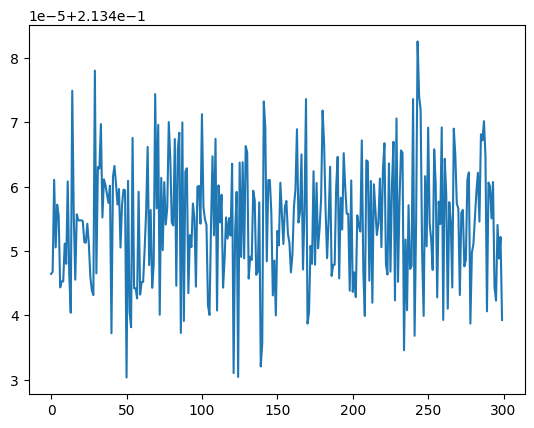

In [8]:
plt.plot(ep[13, :, 0])

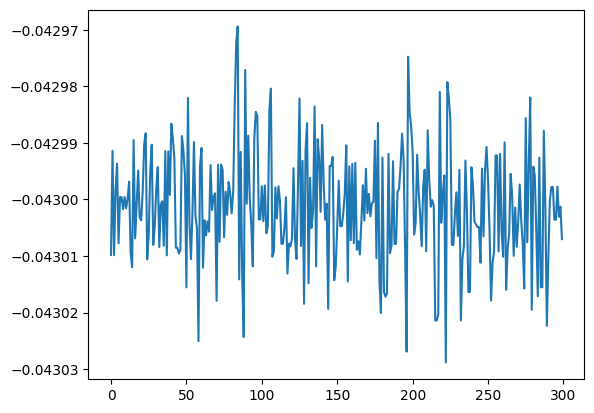

In [6]:
plt.plot(em[17, :, 0])

## Bootstrap 

In [7]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_47/g_samples_boots_472.npz")

In [8]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_48/g_samples_boots_482.npz")

In [9]:
# ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_49/g_samples_boots_492.npz")

In [10]:
ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_45/g_samples_boots_452.npz") # shape_noise = 0.01, N_gal = 10k

In [11]:
ds.keys()

dict_keys(['g_plus', 'g_minus'])

In [12]:
ds['g_plus'].shape

(1000, 1000, 2)

In [13]:
gps = ds['g_plus']
gms = ds['g_minus']

In [14]:
gp1_mean = gps[:, :, 0].mean(axis=1)
gm1_mean = gms[:, :, 0].mean(axis=1)
gp1_mean.shape

(1000,)

(array([  1.,  11.,  31.,  90., 177., 276., 235., 118.,  49.,  10.,   2.]),
 array([0.0196402 , 0.01970672, 0.01977323, 0.01983974, 0.01990626,
        0.01997277, 0.02003929, 0.0201058 , 0.02017231, 0.02023883,
        0.02030534, 0.02037186]),
 <BarContainer object of 11 artists>)

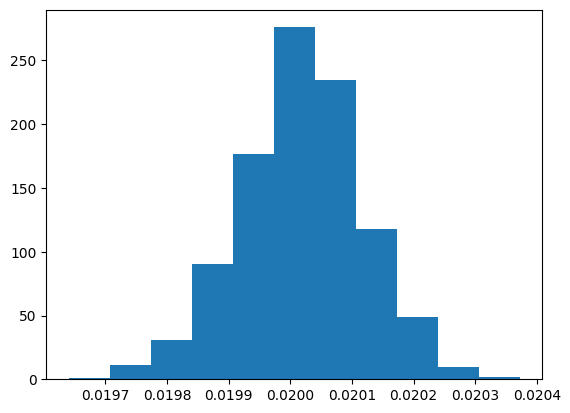

In [15]:
plt.hist(gp1_mean, bins=11)

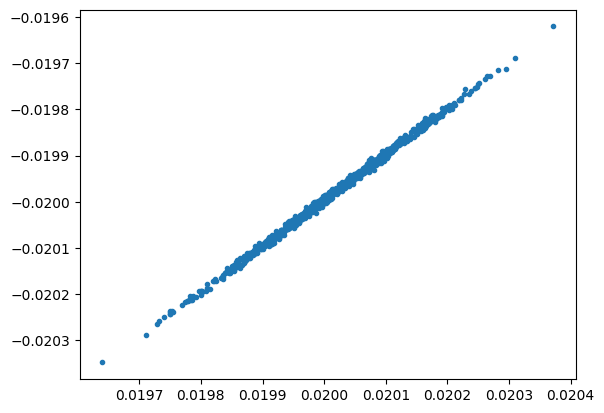

In [16]:
plt.plot(gp1_mean, gm1_mean,'o',  markersize=3, ) 

In [17]:
_cov = np.cov(gp1_mean, gm1_mean)
_cov

array([[1.02855443e-08, 1.02429672e-08],
       [1.02429672e-08, 1.02242774e-08]])

In [18]:
_mvar = (_cov[0, 0] + _cov[1, 1] - 2 * _cov[1, 0]) * (1 / 4 / 0.02**2)
np.sqrt(_mvar)

np.float64(0.00012218674524778385)

In [19]:
m_boot = (gp1_mean - gm1_mean) / 2/ 0.02 - 1

(array([  6.,  32.,  62., 137., 203., 219., 186., 101.,  38.,  13.,   3.]),
 array([-4.67894674e-04, -3.97996006e-04, -3.28097338e-04, -2.58198670e-04,
        -1.88300002e-04, -1.18401334e-04, -4.85026659e-05,  2.13960021e-05,
         9.12946701e-05,  1.61193338e-04,  2.31092006e-04,  3.00990674e-04]),
 <BarContainer object of 11 artists>)

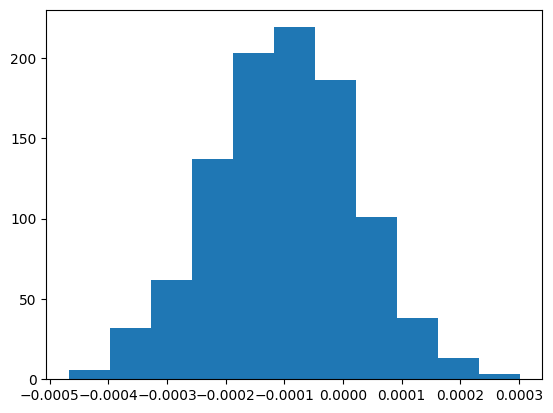

In [20]:
plt.hist(m_boot, bins=11)

In [21]:
m_boot.mean(),  m_boot.std()

(np.float64(-0.00010085750248037172), np.float64(0.00012212563659419714))

In [22]:
m_boot.mean() / m_boot.std()

np.float64(-0.825850372559401)

## Jacks

In [81]:
ds = load_dataset("/pscratch/sd/i/imendoza/data/cache_chains/exp80_45/tmp2/g_samples_jacks_452.npz")

In [82]:
ds['g_plus'].shape

(100, 1000, 2)

In [83]:
gps = ds['g_plus']
gms = ds['g_minus']

In [84]:
gp1_mean = gps[:, :, 0].mean(axis=1)
gm1_mean = gms[:, :, 0].mean(axis=1)
gp1_mean.shape

(100,)

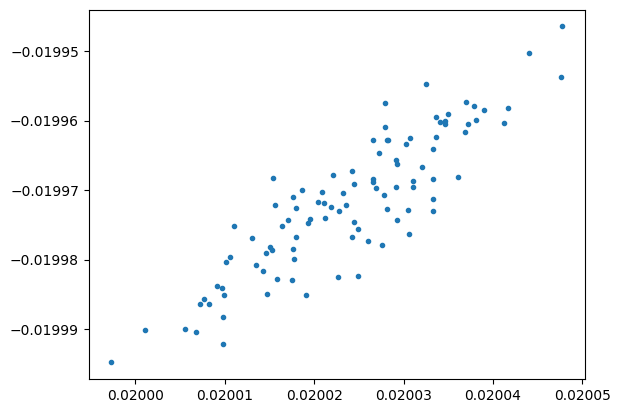

In [85]:
plt.plot(gp1_mean, gm1_mean,'o',  markersize=3, ) 

In [97]:
_cov = np.cov(gp1_mean, gm1_mean)
_cov

array([[1.07499854e-10, 9.08745934e-11],
       [9.08745934e-11, 9.89337949e-11]])

In [91]:
m_jacks = (gp1_mean - gm1_mean) / 2 / 0.02 - 1

In [63]:
_mvar = (_cov[0, 0] + _cov[1, 1] - 2 * _cov[1, 0]) * (1 / 4 / 0.02**2)
np.sqrt(_mvar)

np.float64(0.00012420865052885854)

(array([ 2.,  3.,  9., 12., 29., 14., 11.,  9.,  6.,  5.]),
 array([-4.10151122e-04, -3.50813729e-04, -2.91476335e-04, -2.32138942e-04,
        -1.72801548e-04, -1.13464155e-04, -5.41267612e-05,  5.21063228e-06,
         6.45480258e-05,  1.23885419e-04,  1.83222813e-04]),
 <BarContainer object of 10 artists>)

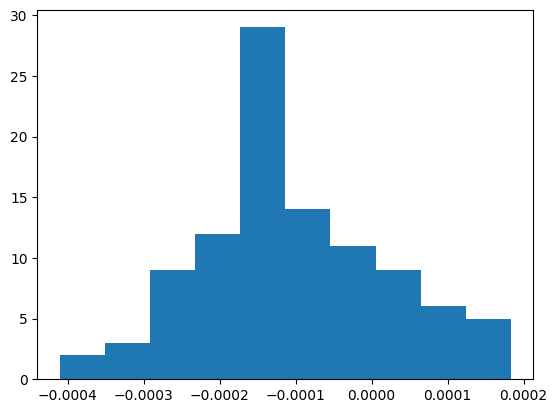

In [54]:
plt.hist(m_jacks)

In [57]:
m_jacks.mean(), m_jacks.std()

(np.float64(-0.00010716381596966085), np.float64(0.0001235860468561769))

In [58]:
np.sqrt(m_jacks.var() * (m_jacks.shape[0] - 1))

np.float64(0.001229665640235661)